In [75]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [76]:
start = datetime.datetime(2014,2,1)
end = datetime.datetime(2022,10,11)

In [77]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))
companies

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0
...,...,...,...,...,...,...,...
2962,ZN,Zion Oil & Gas Inc,Zion Oil & Gas Inc - Common Stock,G,N,N,100.0
2963,ZNGA,Zynga Inc.,Zynga Inc. - Class A Common Stock,Q,N,N,100.0
2964,ZSPH,"ZS Pharma, Inc.","ZS Pharma, Inc. - Common Stock",G,N,N,100.0
2965,ZU,"zulily, inc.","zulily, inc. - Class A Common Stock",Q,N,N,100.0


In [78]:
symbol = companies['Symbol'].tolist()

In [79]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : A,0 : A,

/tmp/ipykernel_4580/239125135.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_final = stock_final.append(stock,sort=False)


2 : L,

/tmp/ipykernel_4580/239125135.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_final = stock_final.append(stock,sort=False)
/tmp/ipykernel_4580/239125135.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_final = stock_final.append(stock,sort=False)


In [80]:
stock_final.head()


,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2014-02-03,41.595135,41.831188,40.114449,40.164520,37.217831,4095161,A
2014-02-04,40.286121,41.402004,40.121601,41.351933,38.318119,4070836,A
2014-02-05,41.187412,41.273247,40.743919,41.080112,38.066246,3192892,A
2014-02-06,41.137341,41.738197,41.101574,41.695278,38.636276,2250081,A
2014-02-07,41.816879,42.539341,41.580830,42.503578,39.385277,2749586,A


**Step 3:** Write the data to a csv file.

In [81]:
# stock_final = stock_final.query("Name == 'A'")
stock_final.drop(stock_final.columns[[4,6]], axis=1, inplace=True)
stock_final
stock_final.to_csv('google.csv',index = False)


In [82]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


        Open       High        Low      Close   Volume
0  41.595135  41.831188  40.114449  40.164520  4095161
1  40.286121  41.402004  40.121601  41.351933  4070836
2  41.187412  41.273247  40.743919  41.080112  3192892
3  41.137341  41.738197  41.101574  41.695278  2250081
4  41.816879  42.539341  41.580830  42.503578  2749586


Open   --- mean : 66.13270734912517   	 Std:  33.30844175420313   	 Max:  179.27999877929688   	 Min:  28.25
High   --- mean : 66.76232455780708   	 Std:  33.67263242765752   	 Max:  179.57000732421875   	 Min:  29.420000076293945
Low    --- mean : 65.48356737704047   	 Std:  32.893680776975934   	 Max:  177.1699981689453   	 Min:  27.32999992370605
Close  --- mean : 66.12623134609551   	 Std:  33.27720162326657   	 Max:  179.27999877929688   	 Min:  28.799999237060547
Volume --- mean : 1806627.517367459   	 Std:  1186756.2200409635   	 Max:  24946891   	 Min:  271900


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [83]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item       Open      Close  Volume
0     0  51.619999  51.430000  461100
1     1  51.910000  51.349998  760900
2     2  52.360001  52.150002  806100
3     3  52.700001  52.799999  774900
4     4  52.000000  53.189999  910900
---
      Item       Open      Close   Volume
6559  6559  41.816879  42.503578  2749586
6560  6560  41.137341  41.695278  2250081
6561  6561  41.187412  41.080112  3192892
6562  6562  40.286121  41.351933  4070836
6563  6563  41.595135  40.164520  4095161


**Step 2: ** Visualise raw data.

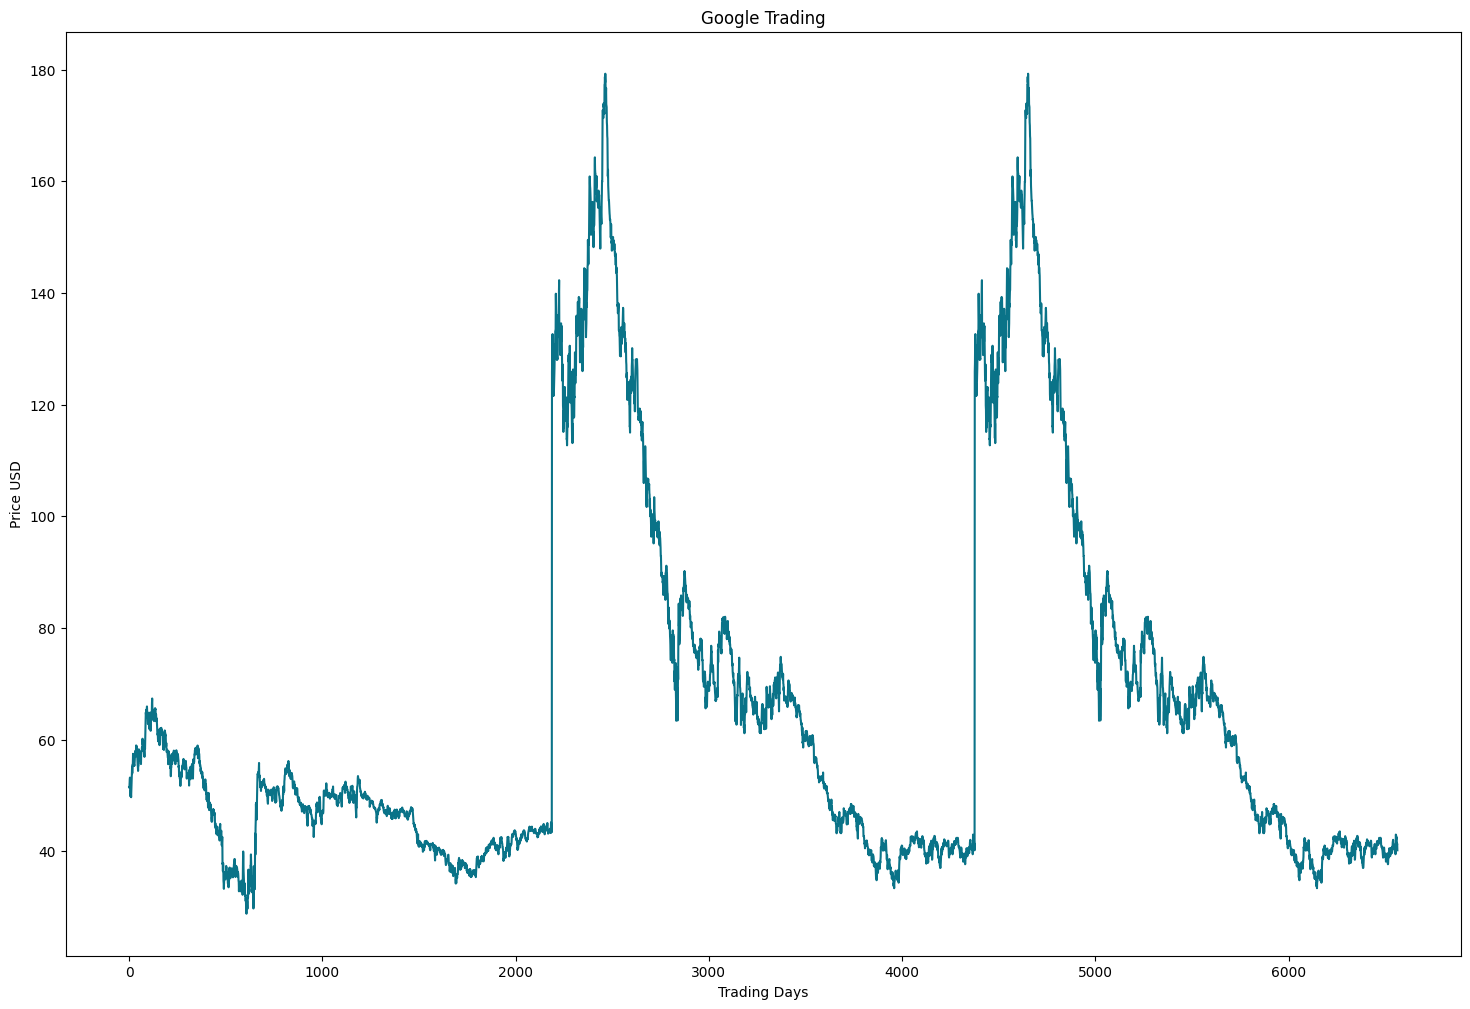

In [84]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [85]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.154737  0.150385  0.007668
1     1  0.156658  0.149854  0.019818
2     2  0.159637  0.155170  0.021649
3     3  0.161888  0.159490  0.020385
4     4  0.157254  0.162081  0.025897


Open   --- mean : 0.25082902506331817   	 Std:  0.22054189249433429   	 Max:  1.0000000000000002   	 Min:  0.0
Close  --- mean : 0.24804779520588932   	 Std:  0.221140362337165   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.06219769309611739   	 Std:  0.048095507716333655   	 Max:  0.9999999999999999   	 Min:  0.0


**Step 4 :** Visualize the data again

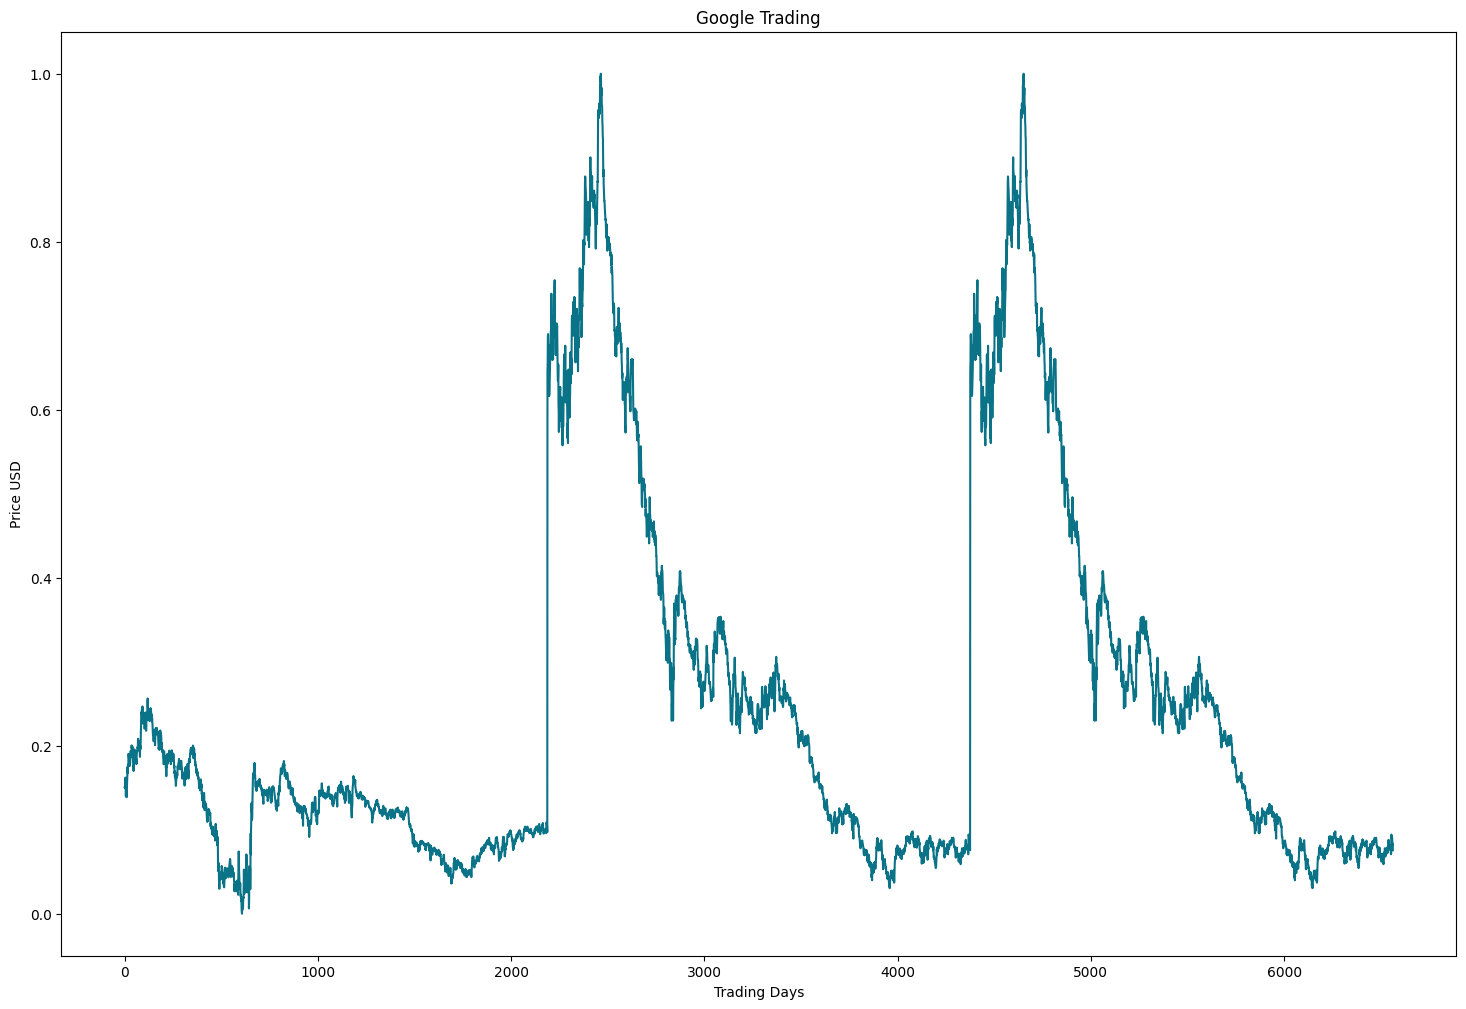

In [86]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [87]:
stocks.to_csv('google_preprocessed.csv',index= False)

**Step 1:** Load the preprocessed data

In [89]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.154737,0.150385,0.007668
1,1,0.156658,0.149854,0.019818
2,2,0.159637,0.155170,0.021649
3,3,0.161888,0.159490,0.020385
4,4,0.157254,0.162081,0.025897


**Step 2:** Split data into train and test pair

In [90]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (4497, 1)
y_train (4497, 1)
x_test (2067, 1)
y_test (2067, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [91]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [92]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

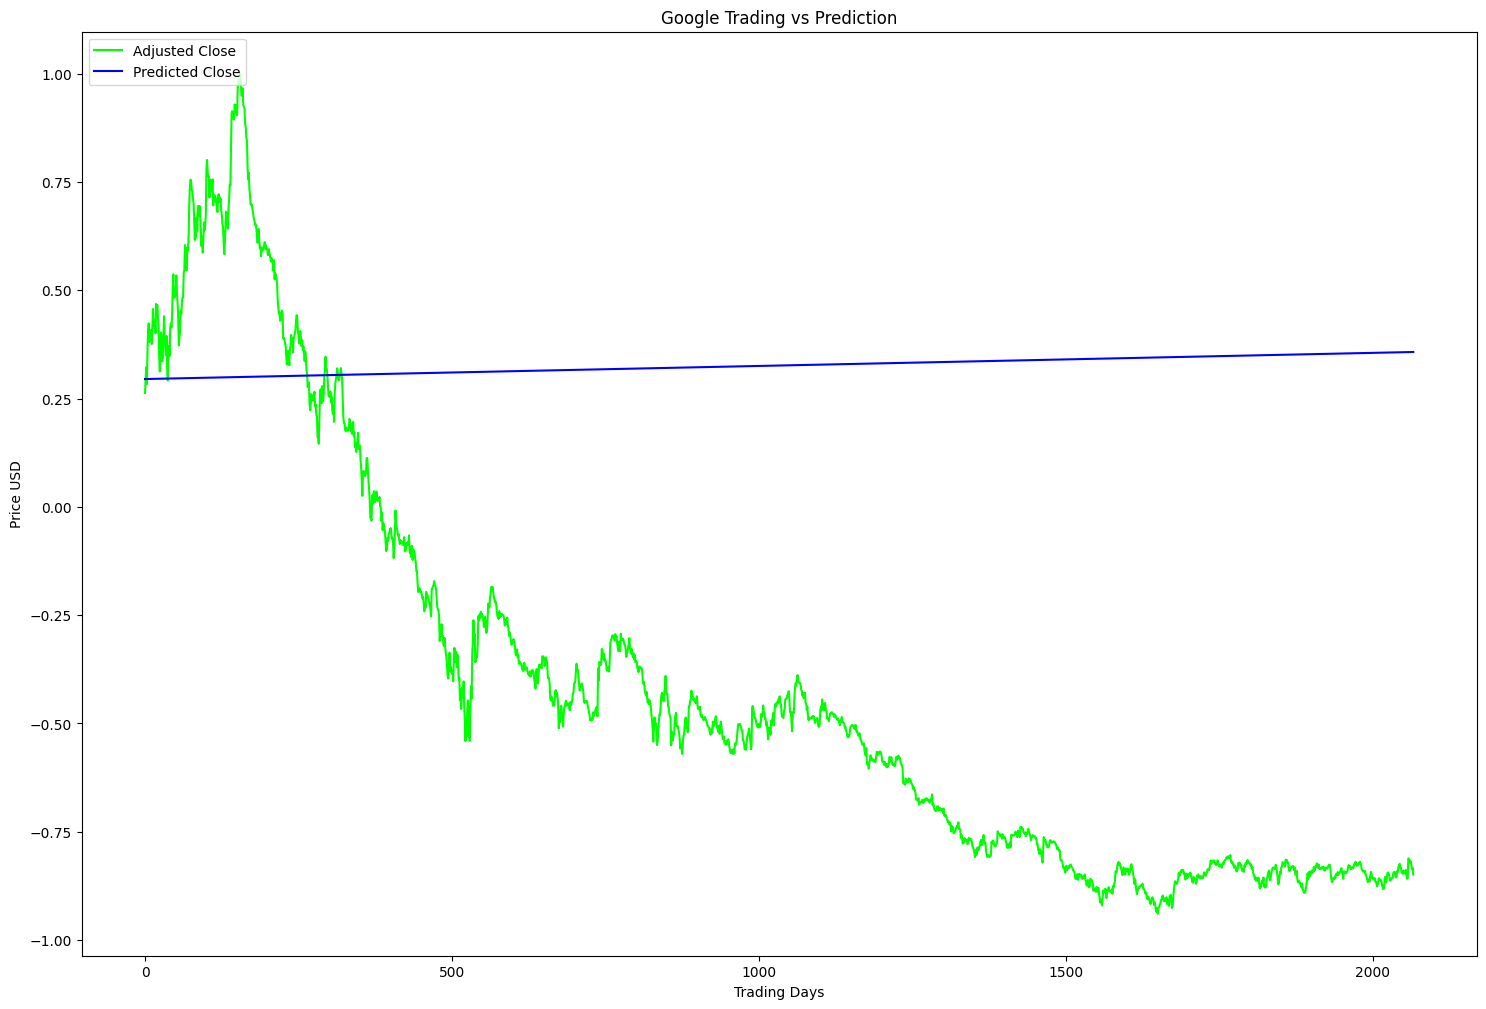

In [93]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [94]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.3242 MSE (0.5694 RMSE)
Test Score: 0.78757063 MSE (0.88745176 RMSE)


### Basic LSTM Model

import keras libraries for smooth implementaion of lstm 

In [13]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

Using TensorFlow backend.


,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [14]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [31]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.05954122543334961


**Step 4:** Train the model

In [32]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Train on 2459 samples, validate on 130 samples
Epoch 1/1
2459/2459 [==============================] - 44s - loss: 0.0032 - val_loss: 3.3625e-04


**Step 5:** make prediction using test data

In [33]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

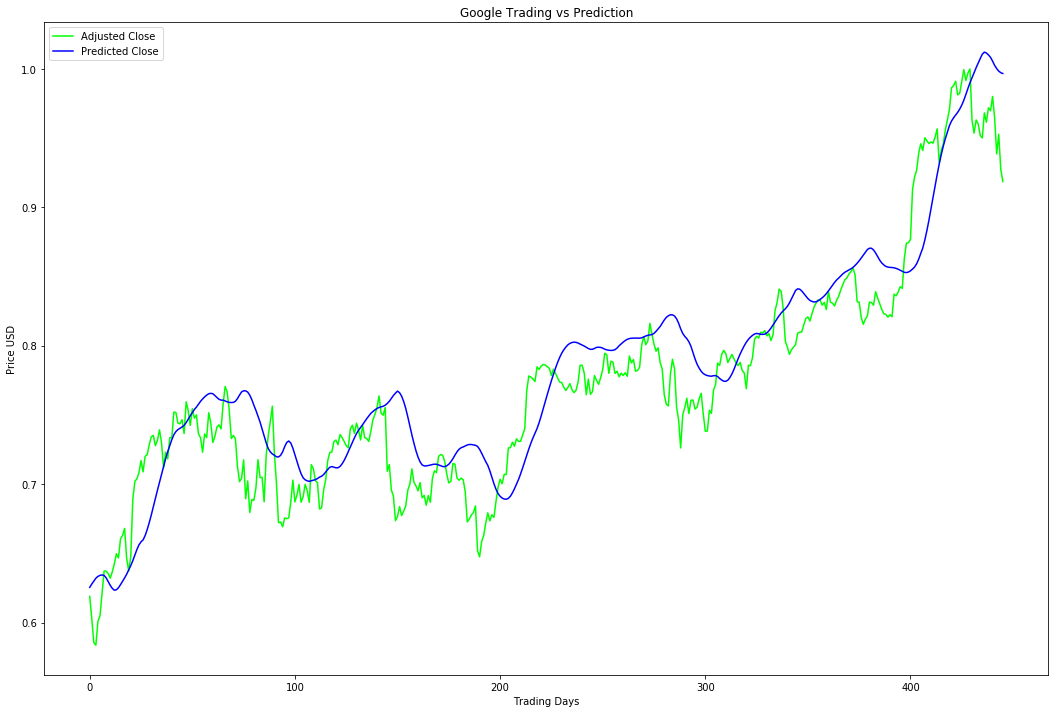

In [34]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [35]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00035862 MSE (0.01893715 RMSE)
Test Score: 0.00109616 MSE (0.03310835 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [47]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.12258362770080566


**Step 2: ** Train improved LSTM model

In [48]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2459 samples, validate on 130 samples
Epoch 1/5
36s - loss: 0.0078 - val_loss: 7.8077e-04
Epoch 2/5
28s - loss: 9.4908e-04 - val_loss: 9.9577e-04
Epoch 3/5
27s - loss: 7.8394e-04 - val_loss: 3.1191e-04
Epoch 4/5
27s - loss: 6.9765e-04 - val_loss: 3.4707e-04
Epoch 5/5
27s - loss: 6.4507e-04 - val_loss: 2.8518e-04


**Step 3:** Make prediction on improved LSTM model

In [49]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

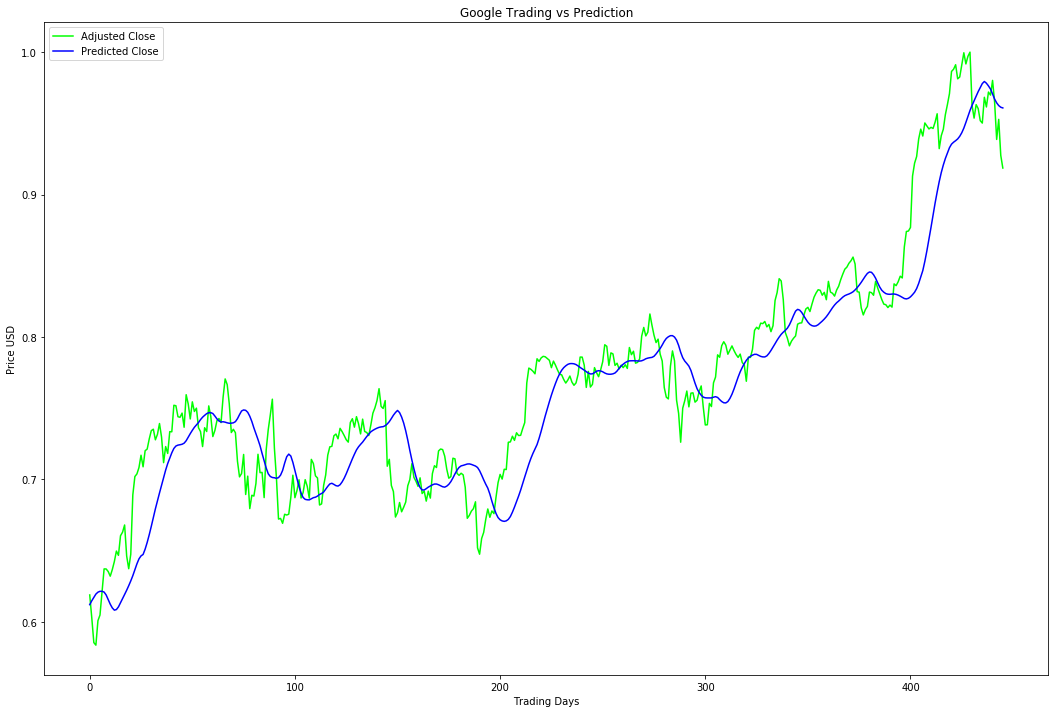

In [50]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [51]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00031550 MSE (0.01776241 RMSE)
Test Score: 0.00099105 MSE (0.03148098 RMSE)


In [52]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.000991 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [53]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].as_matrix()
Y = stocks[:]['Close'].as_matrix()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)
Test Score: 0.3842 MSE (0.6198 RMSE)
